In [22]:
import datetime
import pandas as pd
def parse_time(text):
    return datetime.datetime.strptime(text, '%Y-%m-%d %H:%M:%S.%f')
# id, task, variant, group, time
messages = pd.read_csv('https://raw.githubusercontent.com/true-grue/kispython/main/data/messages.csv', names=['id', 'task', 'variant', 'group', 'time'])
# id, message_id, time, status
checks = pd.read_csv('https://raw.githubusercontent.com/true-grue/kispython/main/data/checks.csv', names=['id', 'message_id', 'time', 'status'])
# task, variant, group, time, status, achievements
statuses = pd.read_csv('https://raw.githubusercontent.com/true-grue/kispython/main/data/statuses.csv', names=['task', 'variant', 'group', 'time', 'status', 'achievements'])


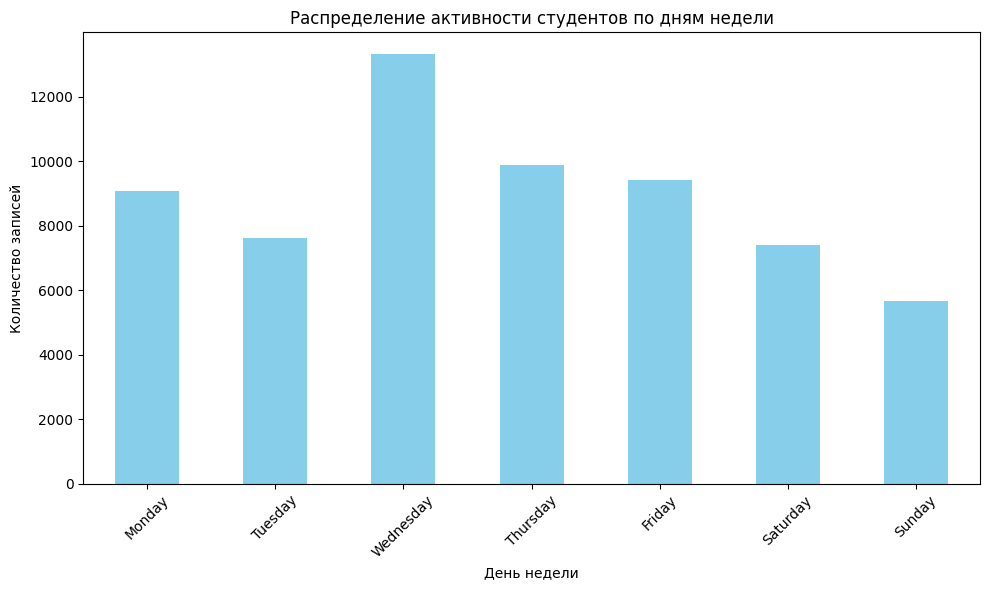

In [23]:
import os

def parse_filename(url: str) -> str:
    return os.path.basename(url)

class Data():
    def __init__(self, url: str, column_names: tuple[str]):
        self.url = url
        self.column_names = column_names
        self.filename = parse_filename(url)

    def get_dataframe(self, sep=',') -> pd.DataFrame:
        response = requests.get(self.url)
        if response.status_code == 200:
            with open(self.filename, "w") as f:
                f.write(response.text)
            return pd.read_csv(self.filename, names=self.column_names, sep=sep)
        else:
            raise Exception("Failed to download CSV file. Status code:{}".format(response.status_code))

DATASOURCES = {
    'statuses': Data('https://raw.githubusercontent.com/true-grue/kispython/main/data/statuses.csv',
                     ('task', 'variant', 'group', 'time', 'status', 'achievements')),
    'messages': Data('https://raw.githubusercontent.com/true-grue/kispython/main/data/messages.csv',
                     ('id', 'task', 'variant', 'group')),
    'checks': Data('https://raw.githubusercontent.com/true-grue/kispython/main/data/checks.csv',
                   ('id', 'message_id', 'time', 'status')),
    'games': Data('https://raw.githubusercontent.com/Newbilius/Old-Games_DOS_Game_Gauntlet/master/GAMES.csv',
                  ('name', 'genre', 'url', 'year'))
}

import matplotlib.pyplot as plt
messages.columns = ['id', 'task', 'variant', 'group', 'time']

messages['time'] = pd.to_datetime(messages['time'])

messages['day_of_week'] = messages['time'].dt.day_name()

activity_by_day = messages['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
activity_by_day.plot(kind='bar', color='skyblue')
plt.title('Распределение активности студентов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.2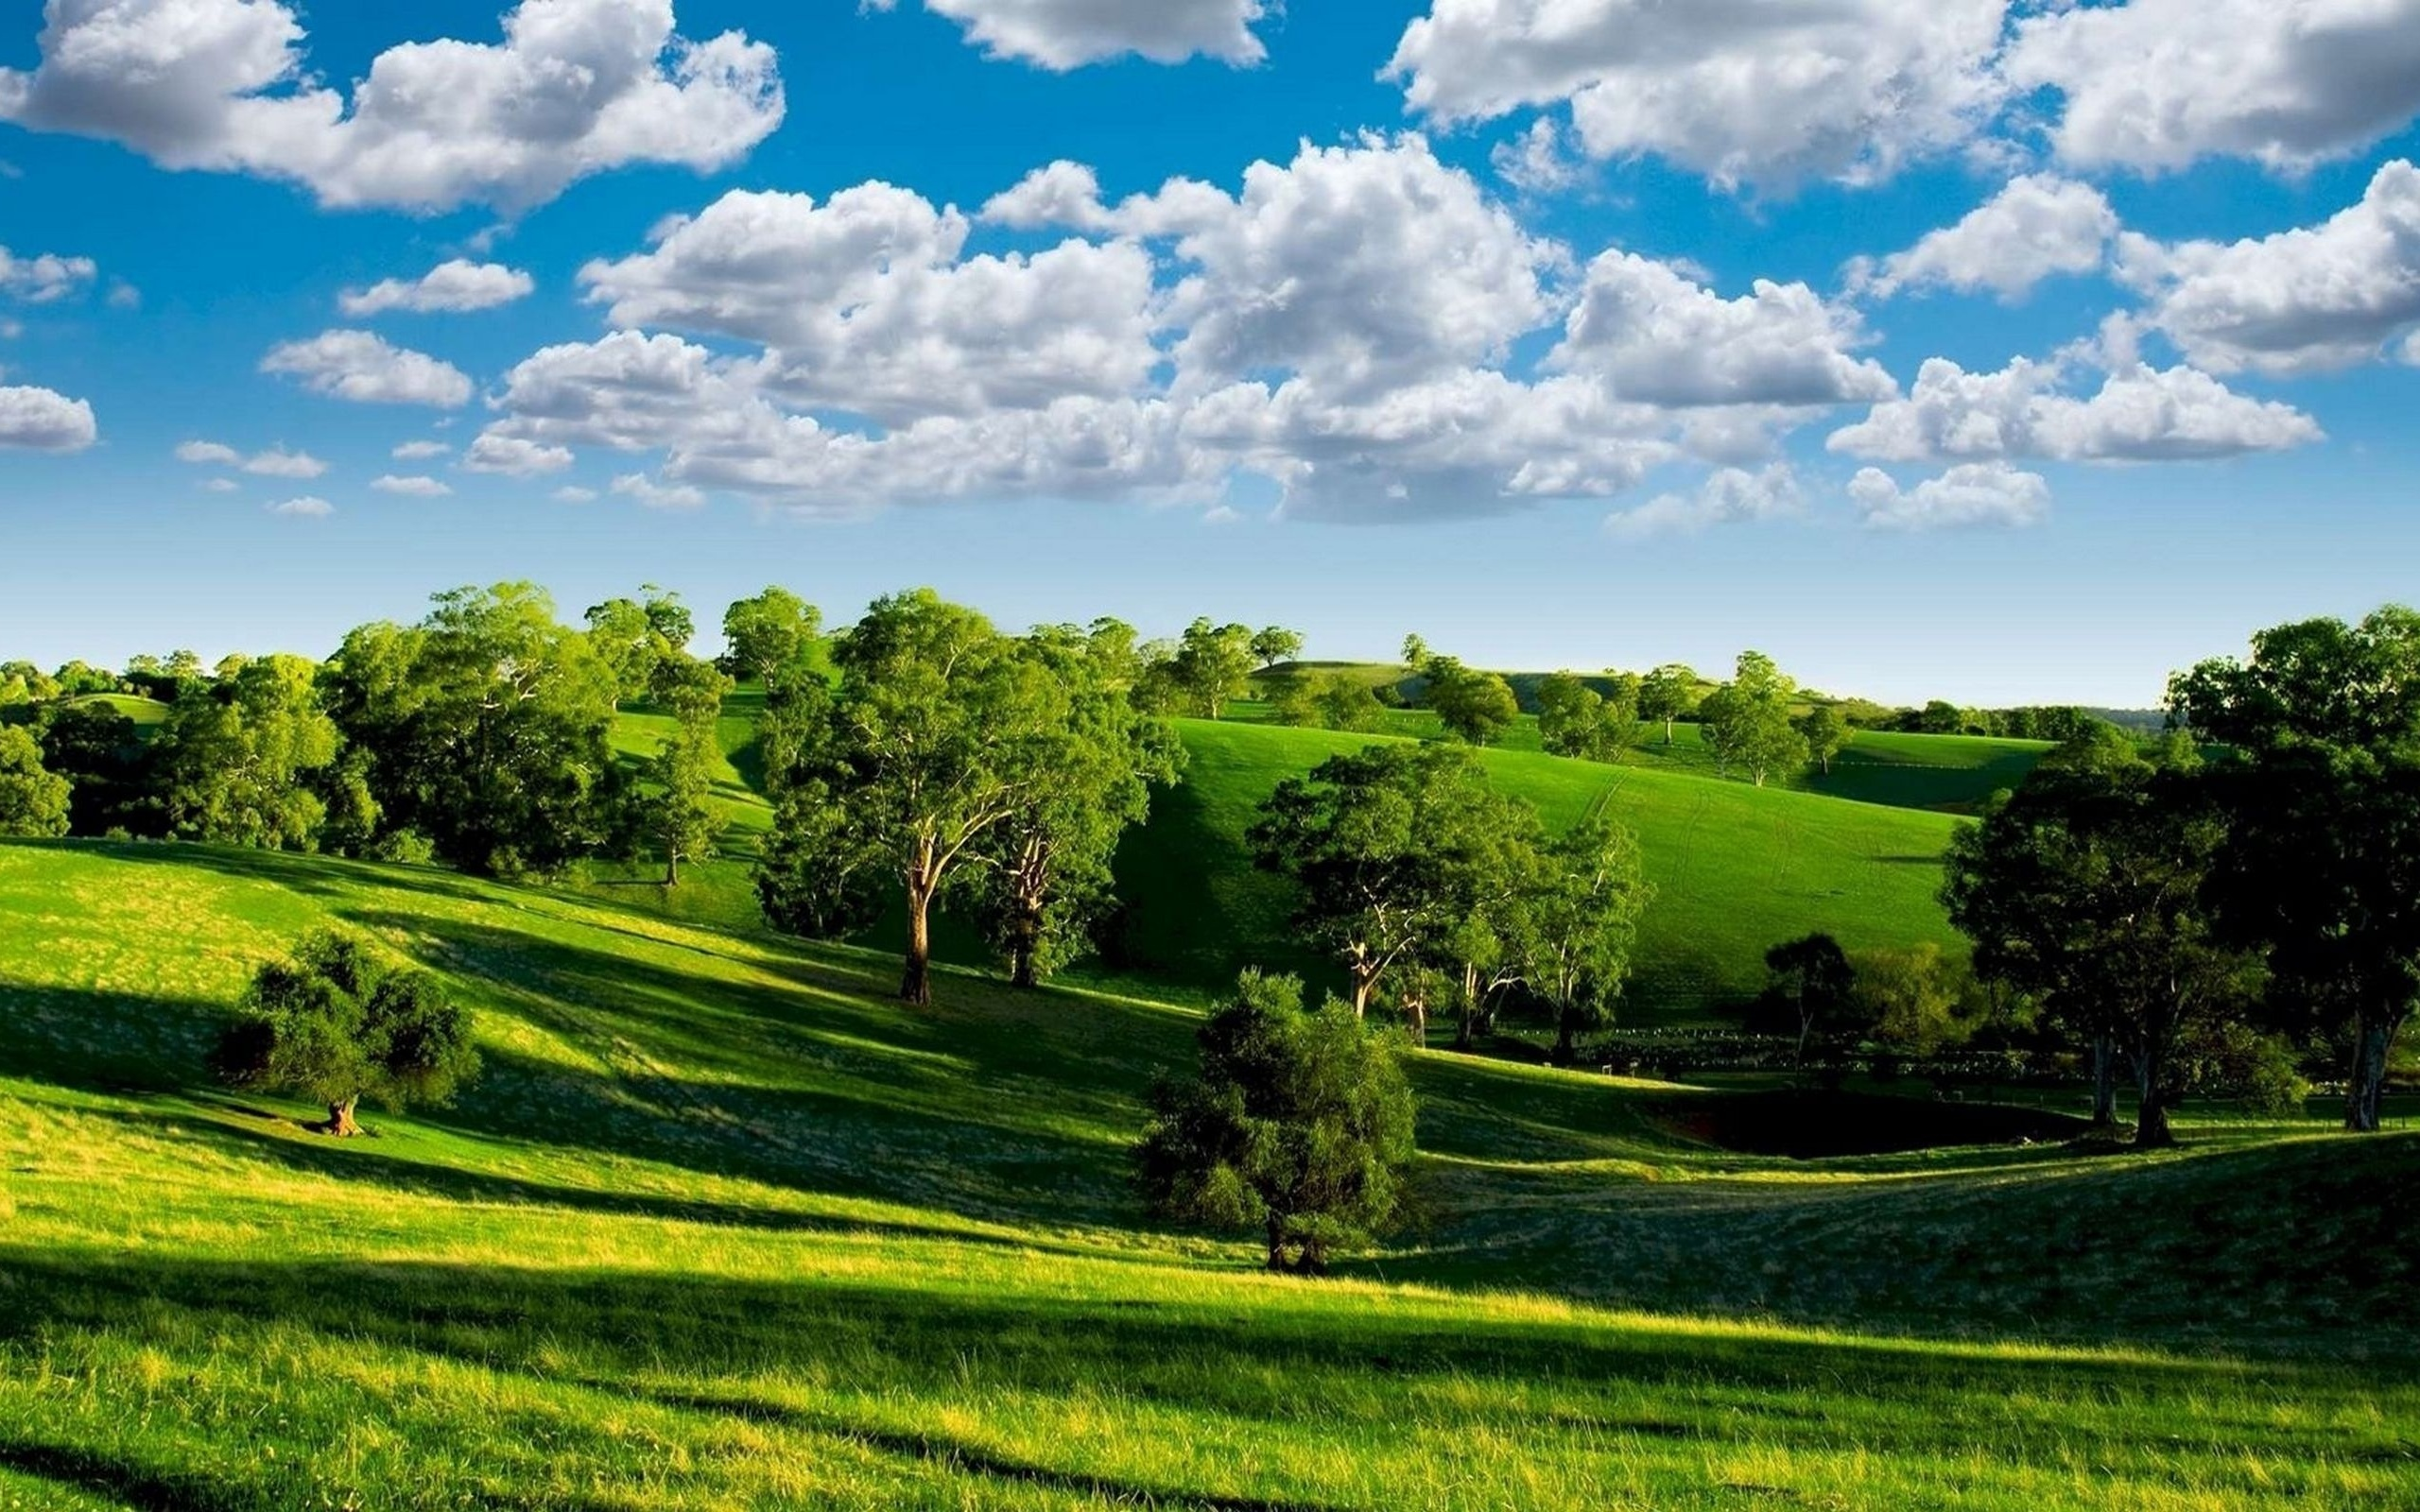**

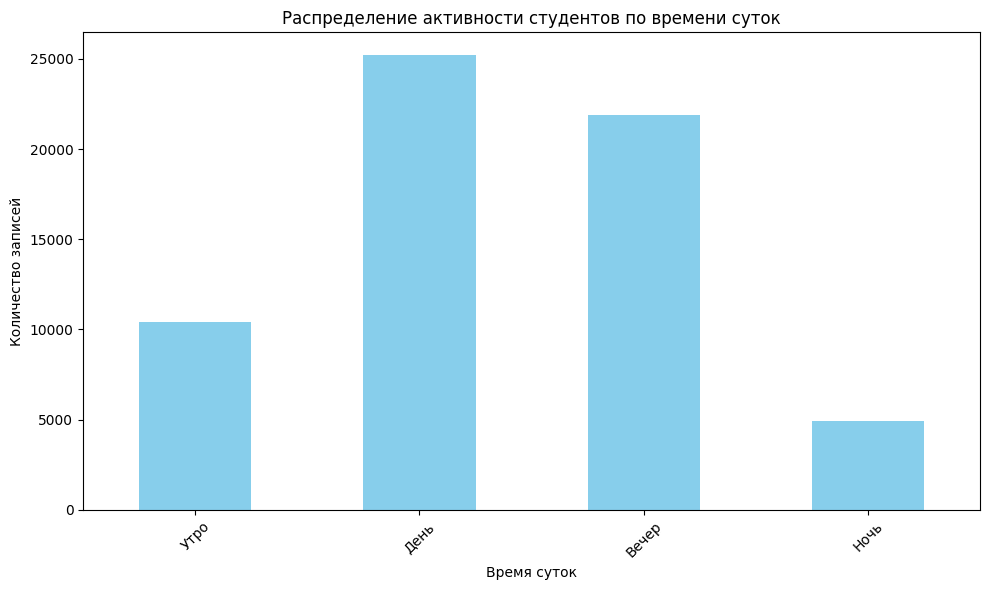

In [4]:
def time_of_day(hour):
  if 5 <= hour < 12:
      return 'Утро'
  elif 12 <= hour < 18:
      return 'День'
  elif 18 <= hour < 24:
      return 'Вечер'
  else:
      return 'Ночь'

messages['time_of_day'] = messages['time'].dt.hour.apply(time_of_day)

activity_by_time_of_day = messages['time_of_day'].value_counts().reindex(['Утро', 'День', 'Вечер', 'Ночь'])

plt.figure(figsize=(10, 6))
activity_by_time_of_day.plot(kind='bar', color='skyblue')
plt.title('Распределение активности студентов по времени суток')
plt.xlabel('Время суток')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.3**

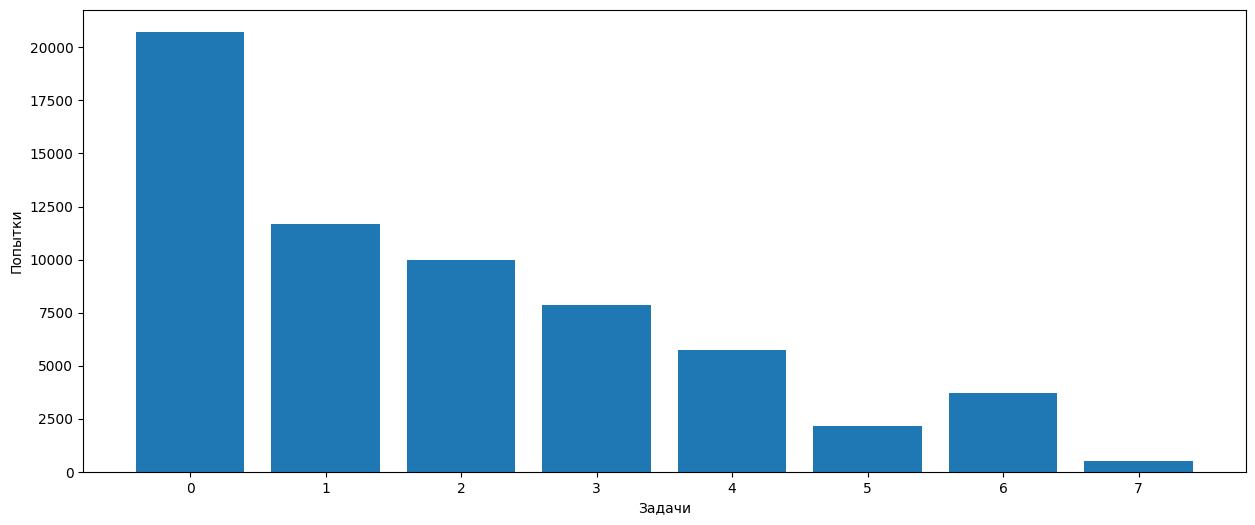

In [5]:
task_counts = messages['task'].value_counts().sort_index()
plt.figure(figsize=(15,6))
plt.bar(task_counts.index, task_counts.values)
plt.xlabel('Задачи')
plt.ylabel('Попытки')
plt.show()

**3.4**

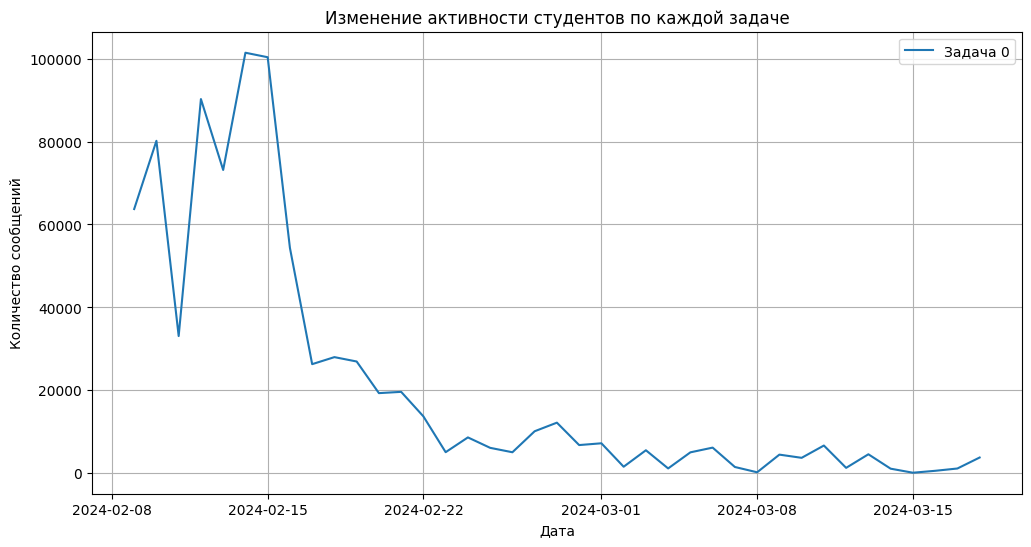

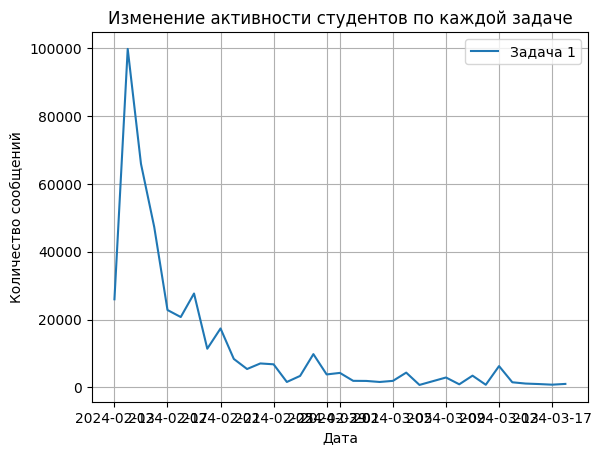

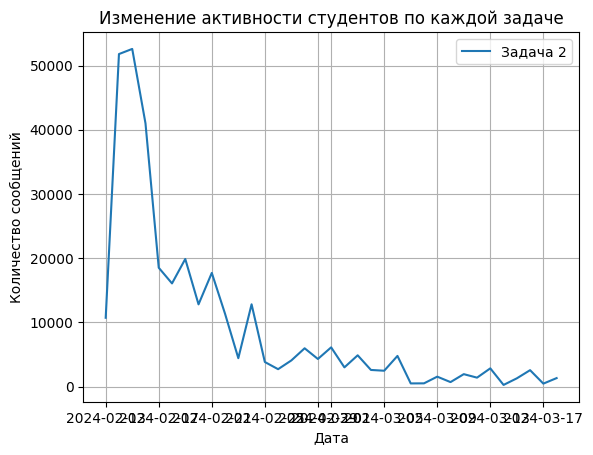

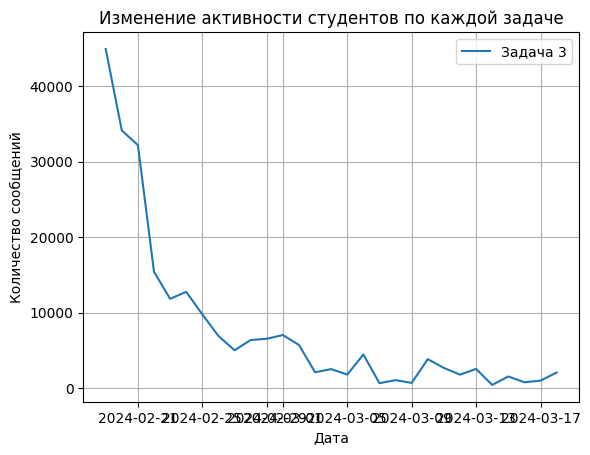

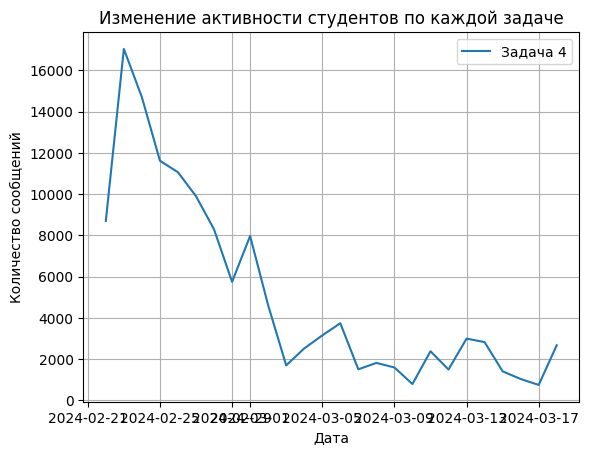

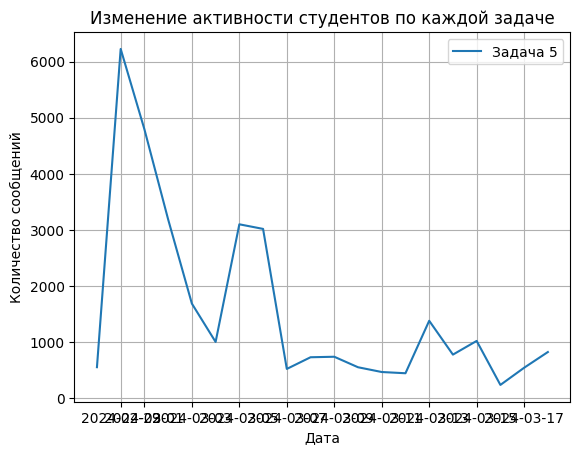

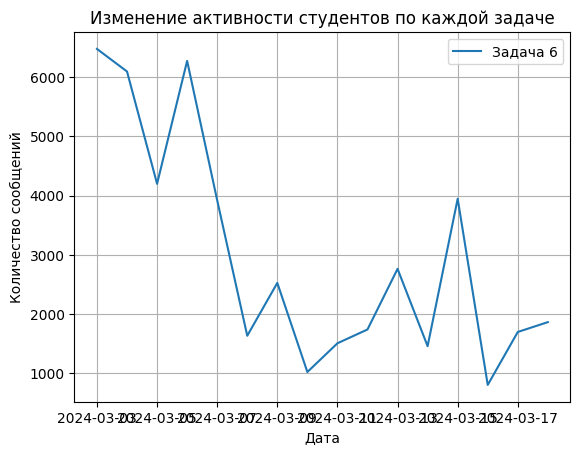

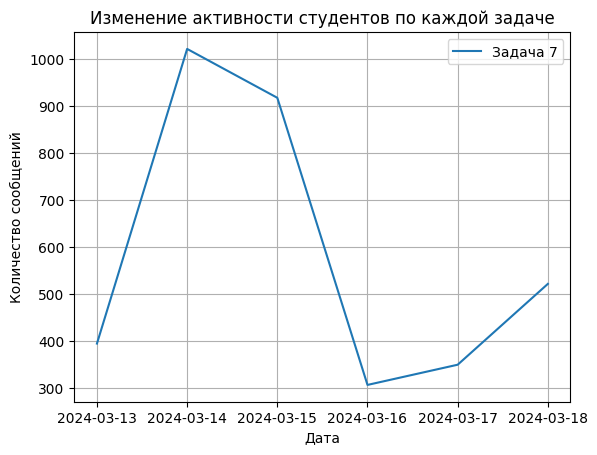

In [6]:
statuses['time'] = pd.to_datetime(statuses['time'])
messages['time'] = pd.to_datetime(messages['time'])

merged_data = pd.merge(messages, statuses, on=['task', 'variant'])

merged_data['date'] = merged_data['time_x'].dt.date

task_activity = merged_data.groupby(['date', 'task']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))

for task in task_activity['task'].unique():
    task_data = task_activity[task_activity['task'] == task]
    plt.plot(task_data['date'], task_data['count'], label=f'Задача {task}')
    plt.title('Изменение активности студентов по каждой задаче')
    plt.xlabel('Дата')
    plt.ylabel('Количество сообщений')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

**3.5**

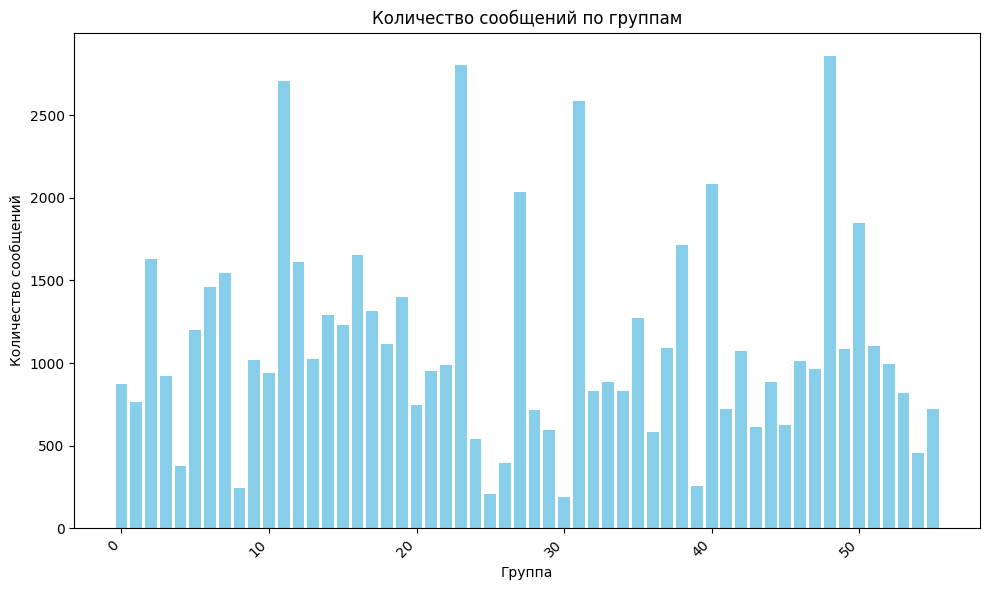

In [14]:
group_message_counts = messages['group'].value_counts().reset_index()
group_message_counts.columns = ['group', 'message_count']

group_message_counts = group_message_counts.sort_values(by='message_count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(group_message_counts['group'], group_message_counts['message_count'], color='skyblue')
plt.title('Количество сообщений по группам')
plt.xlabel('Группа')
plt.ylabel('Количество сообщений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**3.6**

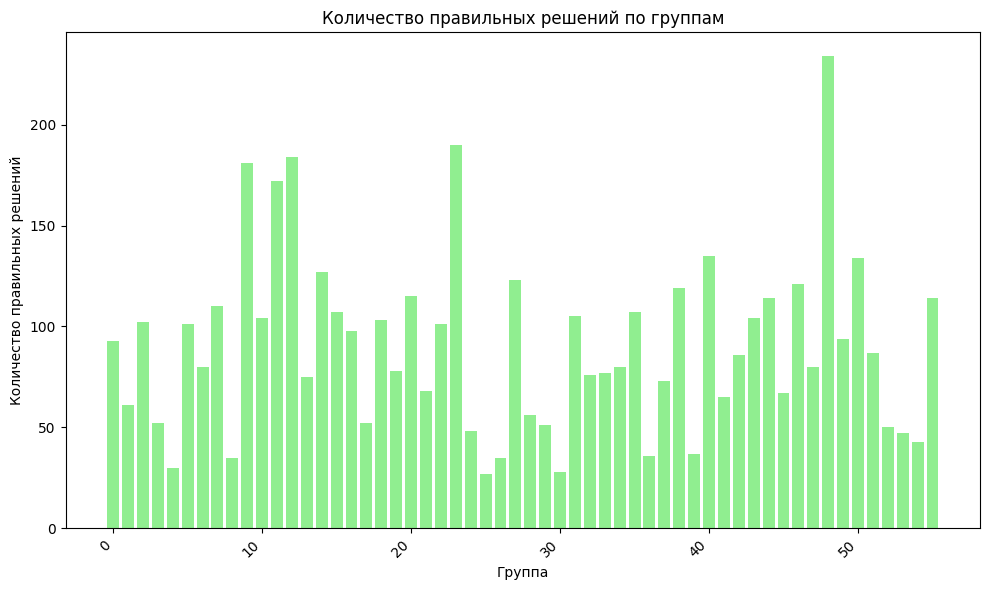

In [15]:
correct_statuses = statuses[statuses['status'] == 2]

group_correct_counts = correct_statuses['group'].value_counts().reset_index()
group_correct_counts.columns = ['group', 'correct_count']

group_correct_counts = group_correct_counts.sort_values(by='correct_count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(group_correct_counts['group'], group_correct_counts['correct_count'], color='lightgreen')
plt.title('Количество правильных решений по группам')
plt.xlabel('Группа')
plt.ylabel('Количество правильных решений')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**3.7**

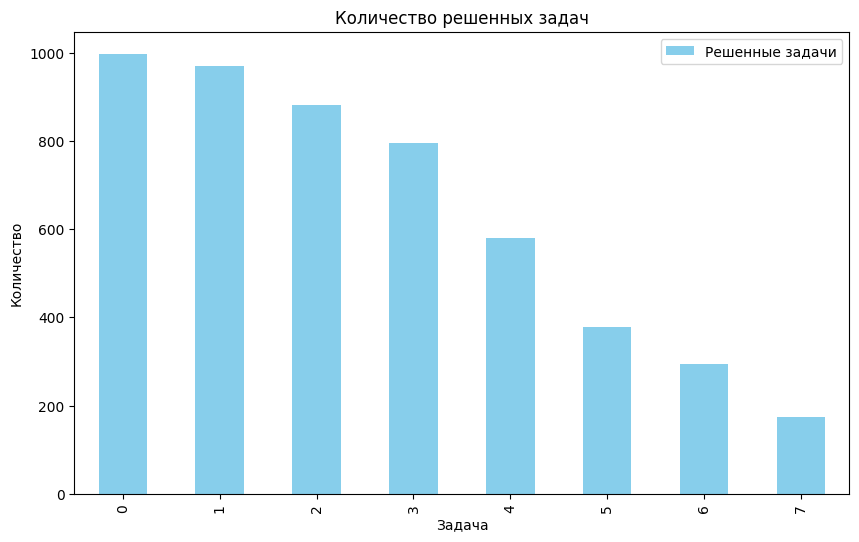

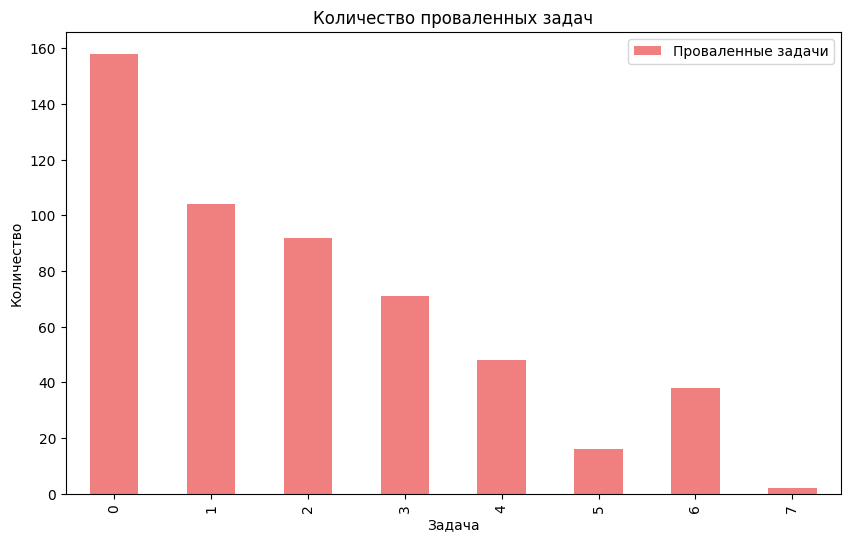

In [10]:
solved_tasks = statuses[statuses['status'] == 2].groupby('task').size()
failed_tasks = statuses[statuses['status'] == 6].groupby('task').size()

plt.figure(figsize=(10, 6))
solved_tasks.plot(kind='bar', color='skyblue', label='Решенные задачи')
plt.title('Количество решенных задач')
plt.xlabel('Задача')
plt.ylabel('Количество')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
failed_tasks.plot(kind='bar', color='lightcoral', label='Проваленные задачи')
plt.title('Количество проваленных задач')
plt.xlabel('Задача')
plt.ylabel('Количество')
plt.legend()
plt.show()

**3.8**

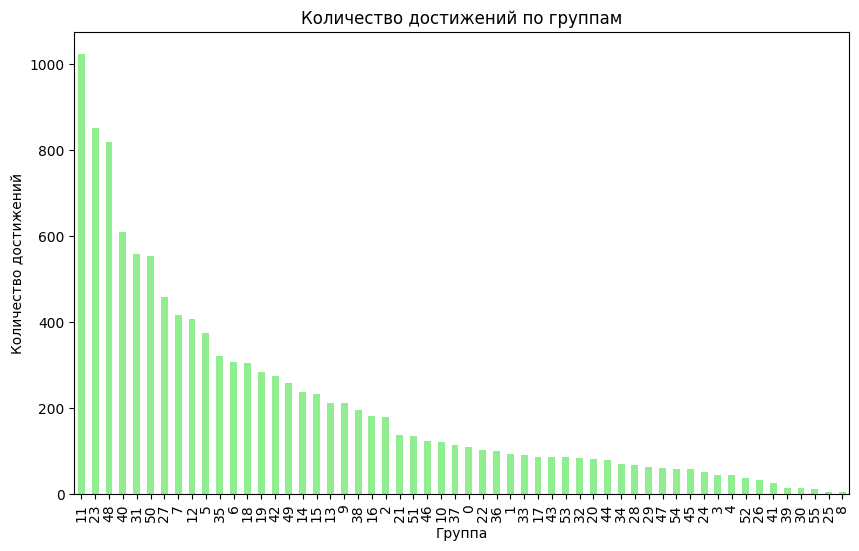

In [11]:
statuses["achievements_count"] = statuses["achievements"].apply(lambda x: sum(eval(x)))

achievements_per_group = statuses.groupby('group')['achievements_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
achievements_per_group.plot(kind='bar', color='lightgreen')
plt.title('Количество достижений по группам')
plt.xlabel('Группа')
plt.ylabel('Количество достижений')
plt.show()

**3.9**

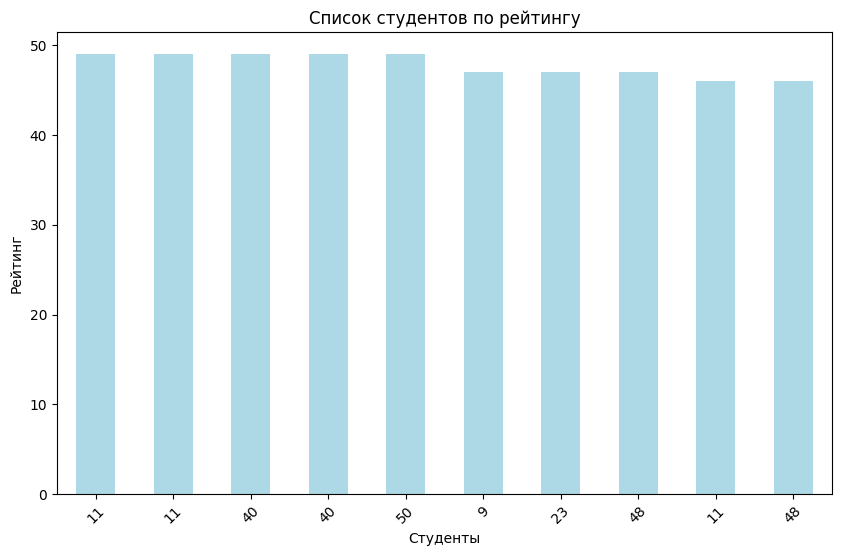

In [13]:
import numpy as np

numeric_columns = statuses.select_dtypes(include=[np.number]).columns
student_ratings = statuses.groupby(['group', 'variant'])[numeric_columns].sum()['achievements_count']

top_10_students = student_ratings.groupby(level=['group', 'variant']).sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_10_students.plot(kind='bar', color='lightblue')
plt.xticks(rotation=45)
plt.xticks(range(len(top_10_students.index)), top_10_students.index.get_level_values('group'))
plt.title('Список студентов по рейтингу')
plt.xlabel('Студенты')
plt.ylabel('Рейтинг')
plt.show()

**3.10**

C:\Users\Baeth\AppData\Local\Temp\ipykernel_6516\3003031217.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_diversity = statuses.groupby('group').apply(lambda x: sum(x['achievements_count']) / len(x['variant'].unique())).sort_values(ascending=False)


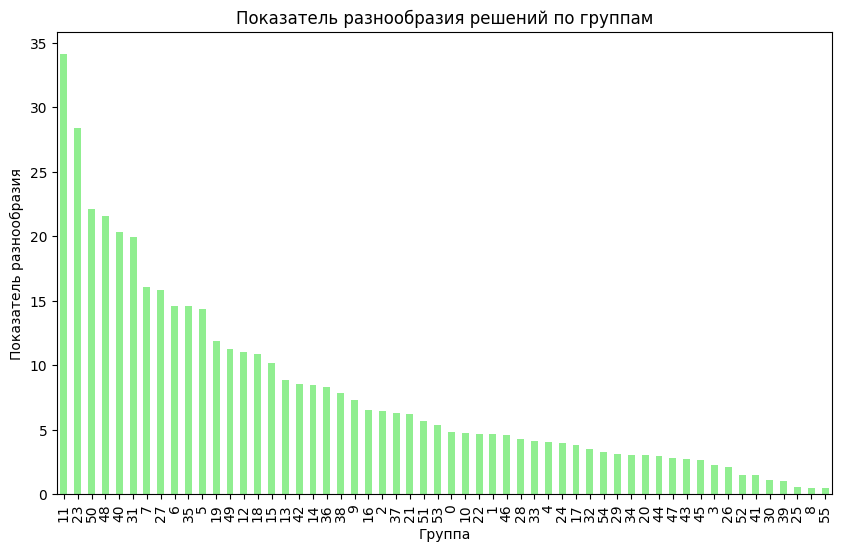

In [14]:
group_diversity = statuses.groupby('group').apply(lambda x: sum(x['achievements_count']) / len(x['variant'].unique())).sort_values(ascending=False)

top_10_groups = group_diversity.nlargest(10)

plt.figure(figsize=(10, 6))
group_diversity.plot(kind='bar', color='lightgreen')
plt.title('Показатель разнообразия решений по группам')
plt.xlabel('Группа')
plt.ylabel('Показатель разнообразия')
plt.show()

**3.11**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import requests  # Import the requests module

# Define the parse_filename function and the Data class here...

games = DATASOURCES['games'].get_dataframe(sep=';')
games.groupby('year').size().drop('не издана').sort_values(ascending=False).head(10).plot(kind='bar', color='blue')

# Hide the spines on the top and right sides of the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=360)
plt.show()





UnicodeEncodeError: 'charmap' codec can't encode character '\xe4' in position 16243: character maps to <undefined>

**3.12**

In [16]:
def map_period(year)->str:
  _year = int(year)
  if(_year<1991):
    return "80-е"
  if(_year<2001):
    return "90-е"
  if(_year<2011):
    return "0-е"
  return "0"

In [17]:
import seaborn as sns

games = DATASOURCES['games'].get_dataframe(sep=';').drop(labels=['url', 'name'], axis=1)
filter = games["year"] != "не издана"
games = games[filter]
games['period'] = games['year'].apply(map_period)
games = games.drop(labels=['year'], axis=1)

genre_counts = games.groupby(['period', 'genre']).size().reset_index(name='count')

pivot = genre_counts.pivot(index='period', columns='genre', values='count')
fig, ax = plt.subplots(figsize=(8,5))
pivot.plot(kind='bar', ax=ax)
ax.spines[['right', 'top']].set_visible(False)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

UnicodeEncodeError: 'charmap' codec can't encode character '\xe4' in position 16243: character maps to <undefined>